In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
Iris = pd.read_csv("iris.csv")
print("Iris shape(Before) = ", Iris.shape)
Iris = Iris[:100]
print("Iris shape(After) = ", Iris.shape)
Iris.head()

Iris shape(Before) =  (150, 5)
Iris shape(After) =  (100, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
Iris.replace(to_replace ="setosa", value =0, inplace=True)
Iris.replace(to_replace ="versicolor", value =1, inplace=True)
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [4]:
x1 = np.array(Iris.loc[(Iris["species"] == 0), "sepal_length"])
y1 = np.array(Iris.loc[(Iris["species"] == 0), "sepal_width"])
x2 = np.array(Iris.loc[(Iris["species"] == 1), "sepal_length"])
y2 = np.array(Iris.loc[(Iris["species"] == 1), "sepal_width"])

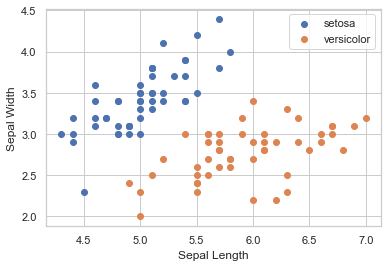

In [5]:
plt.scatter(x1,y1, label="setosa")
plt.scatter(x2, y2, label="versicolor")

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='best')
plt.show()

In [6]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [7]:
# np.random.seed(5)
shuffled = np.random.permutation(len(Iris))
test_index = shuffled[:20]
train_index = shuffled[20:]

train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [8]:
def min_max_normalized(data):
    min = np.min(data)
    max = np.max(data)
    denominator = max - min
    return [(item - min) /denominator for item in data]

In [9]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
W = tf.Variable(tf.random_normal(shape=[4, 1])) # weights
b = tf.Variable(tf.random_normal(shape=[1, 1])) # bias
#constructor for random initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [10]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])
# In placeholder we can not update it after initialization but in variable we can update it 
# any no. of times but we have to initialize the variables at the time of declaration only

In [11]:
train_X = train_X.astype('float32')

In [12]:
# Declare the 'model' you need to learn
# mod = tf.add(tf.matmul(train_X, W), b)
mod = tf.add(tf.matmul(data, W), b)

In [13]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [14]:
# train_y = np.matrix(train_y).T
# sess.run(loss,{target:train_y})

In [15]:
# Define the learning rate， batch_size and number of iterations.
learning_rate = 0.01
batch_size = 30 #using batch makes the training ------?
iter_num = 1500

In [16]:
# Define the optimizer with name opt
opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [17]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [18]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [19]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #randomnly picks up up 30 sample data from the train_X
    batch_index = np.random.permutation(len(train_X))[:30]
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    loss_trace.append(temp_loss)
    #Similarly store train accuracy value for current epoch using sess.run
    train_acc.append(sess.run(accuracy, feed_dict={data: batch_train_X, target: batch_train_y}))
    # recode the results of loss and train accuracy
    temp_train_acc = sess.run(accuracy, feed_dict={data: batch_train_X, target: batch_train_y})
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} '.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))
#Write the command to calculate test accuracy:
test_y = np.matrix(test_y).T
temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: test_y})
print("The test accuracy is: {:5f}".format(temp_test_acc))
sess.close()

epoch:  100 loss: 0.203340 train_acc: 1.000000 
epoch:  200 loss: 0.139338 train_acc: 1.000000 
epoch:  300 loss: 0.136736 train_acc: 1.000000 
epoch:  400 loss: 0.103443 train_acc: 1.000000 
epoch:  500 loss: 0.093453 train_acc: 1.000000 
epoch:  600 loss: 0.077899 train_acc: 1.000000 
epoch:  700 loss: 0.079028 train_acc: 1.000000 
epoch:  800 loss: 0.060609 train_acc: 1.000000 
epoch:  900 loss: 0.066147 train_acc: 1.000000 
epoch: 1000 loss: 0.058083 train_acc: 1.000000 
epoch: 1100 loss: 0.047210 train_acc: 1.000000 
epoch: 1200 loss: 0.047301 train_acc: 1.000000 
epoch: 1300 loss: 0.043368 train_acc: 1.000000 
epoch: 1400 loss: 0.042755 train_acc: 1.000000 
epoch: 1500 loss: 0.048693 train_acc: 1.000000 
The test accuracy is: 1.000000


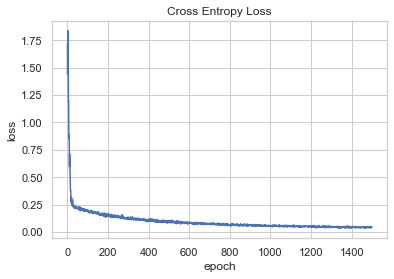

In [20]:
plt.plot(range(iter_num), loss_trace)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

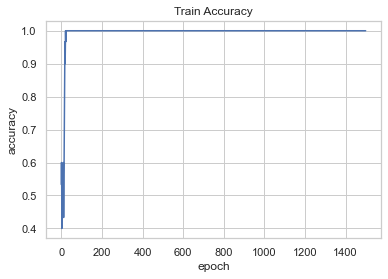

In [21]:
plt.plot(range(iter_num), train_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train Accuracy')
plt.show()